In [3]:
#packages for image insertion:
from IPython.display import Image
from IPython.core.display import HTML 

#packages for math and plotting
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

## NS248 Lecture 1 – Overview, Probability, and Distrubitions.



### Instructors:
    Loren Frank (loren.frank@ucsf.edu) - Lectures 1-5
    Vijay Namboordiri (VijayMohan.KNamboodiri@ucsf.edu) - Lectures 6-10

### TAs:
    Jennifer Disanto (Jennifer.Disanto@ucsf.edu)
    Donghoon Shin (Donghoon.Shin@ucsf.edu)


### Course Structure
    Thursdays: Lectures
    Tuesdays: TA led problem set sessions 
        Students asked to present their solutions to the problem sets
        TA solutions will be posted to the CLE site the morning of the TA session

### Course Website
    https://courses.ucsf.edu/course/view.php?id=11759

    Can also be found through the UCSF Collaborative Learning Environment:

    http://courses.ucsf.edu
    
### Requirements:
    The first five lectures of the course are required for all Neuroscience students, but we encourage everyone to stay for the full course.



### Problem Sets
    You are welcome to work together on problem sets
    
    We'd like you to self-organize into groups of 4-6 for problem set presentations.
    
    Upload to course website by 8:45 am on the Tuesday when they are due

    Suggestion for problem set format:

    Strongly preferrered: Use jupyter notebook. 
    You'll need to be able to use jupyter lab / notebook anyhow to see the lectures.
    
    Alternative:
        Create a word document.
        Paste in code and resulting figures.
        Save as pdf.


#### Grading

Everyone is expected to attempt every problem in each problem set and turn in the results.

    A - all problem sets turned in with all problems attempted.
    B - at least four problem sets turned in with all problems attempted
    C - Less than four problem sets turned in with all problems attemptedGoals

### Goals
	Learn how to think about analyzing data from neuroscience experiments
	Learn how to build data analysis model

#### Issues
	Neural / behavioral data are complicated	
        Always multiple relevant covariates
		Some can be controlled, others cannot
	Data analysis as model building.
		Comparison to hypothesis testing
	All analyses involve assumptions
    

#### Trade-off: strength of assumptions versus power of analysis.
		Build the simplest model that accurately describes the data. 
		Minimize errors
			Different types of errors
				Grid of truth (Note that the right way to do this is for a null hypothesis; see lecture 2)
				Type 1 – Reject true null hypothesis
				Type 2 – Accept false null hypothesis
                
|  | Hypothesis True | Hypothesis False |
|---|---|---|
| **Conclude True** | Correct | False Positive |
| **Conclude False** | False Negative| Correct Rejection |

## Probability (for background, see 3.pdf which is chapter 3 of the stats book)

#### Definition
    Sample space S containing finite number of points (n) 


> $s_{i}\ for\ i = 1,\ \ldots,\ n$
 
> $p_{i} > 0\ for\ i = 1,\ \ldots,\ n\ and\ \sum_{i = 0}^{n}{p_{i} = 1}$

Negation

> $\sim p_{i} = 1 - p_{i}$

Conditional Probability

> $\Pr\left( B \middle| A \right) = \frac{Pr(B,A)}{Pr(A)}$

        Conditional probability that B is true given that A is true 
        (or proportion of events within A and B relative to total number in A)

image from https://tivadardanka.com/blog/conditional-probability   


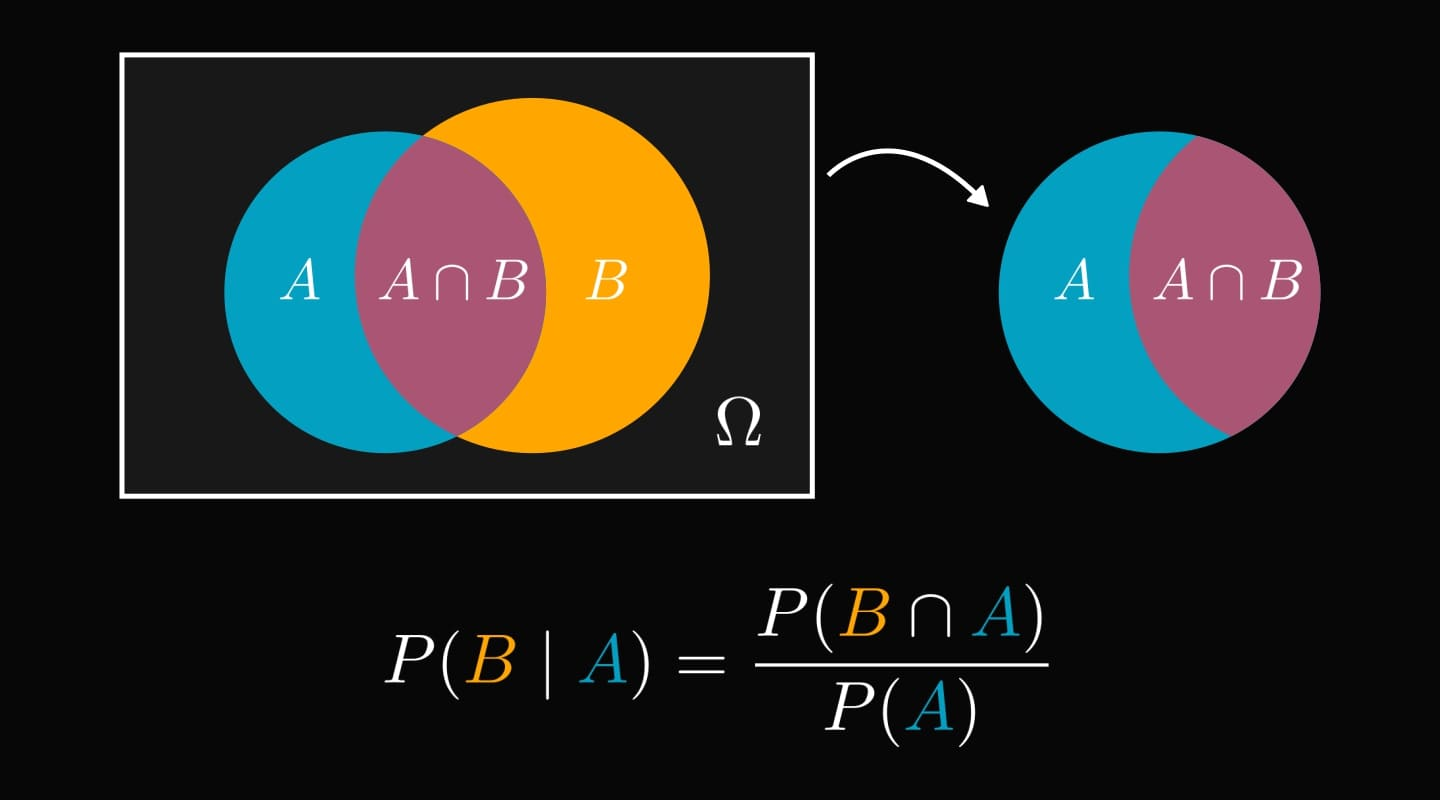

In [156]:
Image(filename = "conditional_probability.jpg", width=800)

#### Bayes’ rule

> $$\Pr\left( A_{j}|B \right) = \frac{Pr(B|A_{j})Pr(A_{j})}{Pr(B)}$$

> $$Pr(A_{j}) \text{ is the prior}$$
> $$Pr(A_{j}|B) \text{ is the posterior}$$



##### The law of total probability can be derived from Bayes’ rule:

> $$\Pr(B) = \sum_{j = 1}^{k}{Pr(B|A_{j})Pr(A_{j})}$$
>
> This equality allows one to decompose complicated probability problems
> into simpler pieces weighted by the probabilities of scenarios
> ($A_{j}$) assuming that the set of ($A_{j}$) contains all possible outcomes. In data analysis, this interaction between the conditional
> probabilities and the weighting can produce [Simpson’s
> paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox).



#### Bayes rule examples:

Suppose we are trying to figure out how many of a rare cell type (call it "Z+") we have in a brain area. 

Let's say that our antibody staining is known to be 95% accurate, meaning that for each cell in a sample, it shows a true positive result 95% of the time if that cell is of our cell type, and similarly, it shows a true negative result 95% of the time if that cell is not of our cell type. 

$$ \Pr(Test+|Z+) = 0.95 $$
$$ \Pr(Test-|Z-) = 0.95 $$

Suppose we also know, from previous work, that ~0.5% of all cells are of this type:

$$ \Pr(Z+) = 0.005 $$

Now suppose that in a given tissue section, we see one cell with a postive result from our staining. What's the probability that that cell is actually Z+?

From Bayes rule:
$$\Pr\left( Z+ | Test+ \right) = \frac{Pr(Test+|Z+)Pr(Z+)}{Pr(Test+)}$$

We have everything except $ Pr(Test+) $ but this is actually fairly easy, as we just need to enumerate the cases:

$$ Pr(Test+) = Pr(Test+|Z+)Pr(Z+) + Pr(Test+|Z-)Pr(Z-) $$

Calculating this out: 

In [5]:
Pr_TPos_Zpos = 0.95
Pr_ZPos = 0.005

Pr_Zpos_Tpos = (0.95 * 0.005) / ((0.95 * 0.005) + (0.05 * .95))

print(f'Pr(Z+|Test+) = {Pr_Zpos_Tpos:2.2}')

Pr(Z+|Test+) = 0.091


#### Independence: Knowing A gives no information about B and vice versa

$$\Pr(A,B) = Pr(A)Pr(B)$$


This is equivalent to 

$$\Pr\left( A \middle| B \right) = Pr(A) \text{ and}$$
$$\Pr\left( B \middle| A \right) = Pr(B)$$


#### Conditional independence: adding conditioned events.

If A,B are conditionally independent given C, then

$$\Pr\left( A,B \middle| C \right) = \Pr\left( A \middle| C \right)\Pr\left( B \middle| C \right)$$

This is equivalent to
$$\Pr\left( A \middle| B,C \right) = Pr(A|C)$$ and
$$\Pr\left( B \middle| A,C \right) = Pr(B|C)$$.

Conditional independence is central to the definition of Markovianess,
which we will cover in later lectures. Conditional independence does not
imply independence and vice versa.

### Random variables

Definition(s)

    1.  “a random variable is a quantity whose values are random and to
        which a probability distribution is assigned” or

    2.  . “… a measurable function from a sample space to the measurable
        space of possible values of the variable.” (Wikipedia)

    3.  Set of possible outcomes resulting from a sampling of an event.




Individual instancse of a random variable are iid: independent and identically distributed.

When we say $X_{i}$’s are iid, it means that each $X_{i}$ are
independent of any other $X_{j}$ ($j \neq i$) and that each $X_{i}$ have
the same distribution. 


### Distribution Functions

Probability Distribution Function (pdf)

> Function ${f(u)}$ describing probability of getting various values of x:

> Requires that $\int_{- \infty}^{\infty}{f(u)du = 1}$ for continuous case or
> $\sum_{i = - \infty}^{\infty}{f(i)= 1}$ for discrete case

Note that for a continuous function, the probability of any individual observation is 0.


#### Cumulative Distribution Function (cdf)

> Function ${F(x)}$  describing cumulative probability of getting various values of x:

$$ F(x) = P(X < x) = \ \int_{- \infty}^{x}{f(u)du} $$

CDFs are very useful for simulating data 

Simulating data from an arbitrary CDF:

> 1.  Draw random number R between 0 and 1.

> 2. Find x coordinate of CDF that corresponds to y coordinate of R. This is the value of your sample from the distribution.

> 3. Repeat for each desired sample.



### Common Distributions

Uniform

$$\begin{aligned} & f(x)=\frac{1}{b-a}, a<x \leq b \\ & F(x)=\frac{(x-a)}{b-a}, a<x \leq b \text { (discrete or continuous) }\end{aligned}$$

    Uniform distributions are useful for simulations: for p=0.75 events, choose all values form uniform that are <0.75
   
Python: scipy.stats.uniform

In [9]:
#Plot of simulated and actual uniform distribution
from scipy.stats import uniform
xmin = 0
xmax = 1
bins = 10
n_simulate = 100000
simulated_values = uniform.rvs(loc=xmin, scale=xmax ,size=n_simulate)


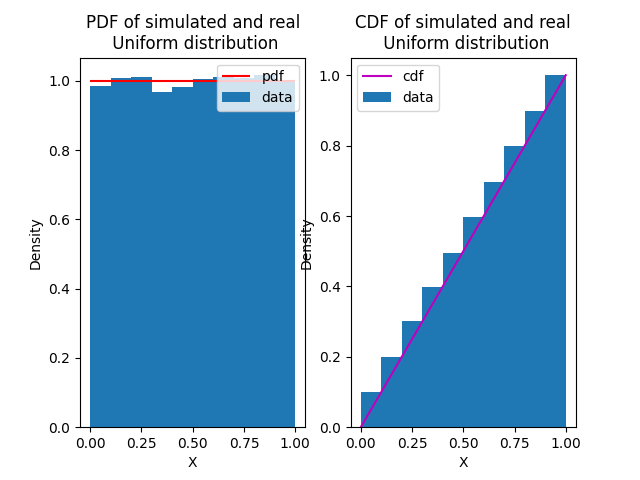

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2)
#first subplot: pdf
pdf_val= uniform.pdf(xmin, loc=xmin, scale=xmax-xmin)
ax1.cla()               
ax1.hist(simulated_values,density = True, bins=bins)
ax1.hlines(y=pdf_val, xmin=xmin, xmax=xmax, color='r')
ax1.set_title('PDF of simulated and real\n Uniform distribution')
ax1.set_ylabel('Density')
ax1.set_xlabel('X')
ax1.legend(('pdf', 'data'))

#second subplot: cdf
cdf = uniform.cdf([xmin, xmax], loc=xmin, scale=xmax-xmin)
ax2.cla()               
ax2.hist(simulated_values, cumulative = True, density=True, bins=bins)
ax2.plot([xmin, xmax], [0,1], color='m')
ax2.set_title('CDF of simulated and real\n Uniform distribution')
ax2.set_ylabel('Density')
ax2.set_xlabel('X')
l = ax2.legend(('cdf', 'data'))

#### Bernoulli

    Single event, two outcomes

\begin{aligned}
& \mathrm{P}(\text { sucess })=p ; \mathrm{P}(\text { failure })=1-p \\
& \mathrm{P}(k)=\left\{\begin{array}{ll}
p & \mathrm{k}=1 \\
1-p & \mathrm{k}=0
\end{array}\right\}
\end{aligned}

       



#### Binomial

    Set of n i.i.d. Bernoullis, probability of k successes in n trials.

    Model for behavior for a well-trained animal or number of spikes from a constant rate cell
   
\begin{aligned} 
& P(success) = p \\
& P(failure) = 1-p \\
& f(k)=\mathrm{P}(k)=\binom{n}{k} p^k(1-p)^{n-k} \\
& \binom{n}{k}=\frac{n!}{k!(n-k)!} \\
& F(k)=\sum_{k=1}^n\binom{n}{k} p^k(1-p)^{n-k}
\end{aligned}

    Python: scipy.stats.binom

In [13]:
#Plot of simulated and actual binomial distribution (note that pmf method refers to probability mass function, which is a pdf)
from scipy.stats import binom
n = 20
p = 0.5
#note that n_simulate corresponds to the number of times we have n trials with the corresponding P(success) = p,
# so the total number of trials would be n*n_simulate
n_simulate = 10000

# get a list of possible outcome values
k = np.arange(0, n+1, 1)

#set the bin edges so the count variables are in the middle. Note that we need k[-1]+0.6 to make sure we get the last bin
bin_edges = np.arange(-0.5, k[-1]+0.6, 1)
simulated_values = binom.rvs(n, p, size=n_simulate)

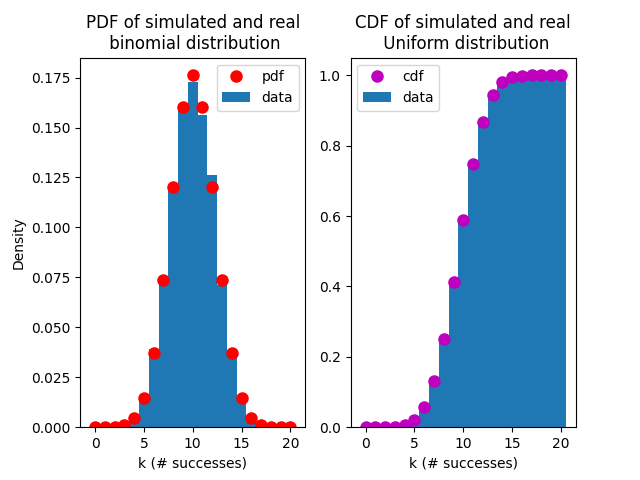

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2)
#first subplot: pdf
ax1.cla()  
ax1.plot(k, binom.pmf(k, n, p), 'ro', ms=8, label='binomial pmf')
ax1.hist(simulated_values, density=True, bins=bin_edges)
ax1.set_title('PDF of simulated and real\n binomial distribution')
ax1.set_ylabel('Density')
ax1.set_xlabel('k (# successes)')
ax1.legend(('pdf', 'data'))

#second subplot: cbdf
cdf = binom.cdf(k, n, p)
ax2.cla()      
ax2.plot(k, binom.cdf(k, n, p), 'mo', ms=8, label='binomial cdf')
ax2.hist(simulated_values, cumulative = True, density=True, bins=bin_edges)
ax2.set_title('CDF of simulated and real\n Uniform distribution')
ax2.set_xlabel('k (# successes)')
l = ax2.legend(('cdf', 'data'))

#### Gaussian (normal) distribution
$$ x\mathbb{\sim N}\left( \mu,\sigma^{2} \right)$$
$${f\text{(}x\text{)} = \frac{1}{\sigma\sqrt{2\pi}}\exp\left( \frac{(x - \mu)^{2}}{2\sigma^{2}} \right)}$$


Python: scipy.stats.norm



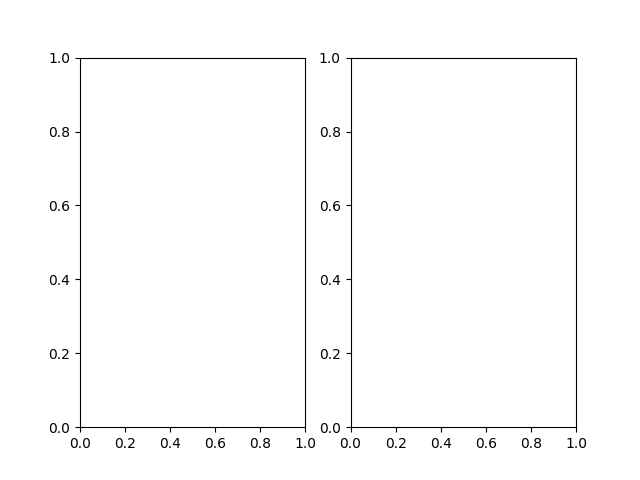

In [19]:
#Plot of simulated and actual gaussian distribution
from scipy.stats import norm

mu = 0
sigma = 1
x = np.linspace(norm.ppf(0.001, loc=mu, scale=sigma),
                norm.ppf(0.999, loc=mu, scale=sigma), 100)
bin_edges = np.linspace(x[0]-.1, x[-1]+.1, 100)

n_simulate = 100000
simulated_values = norm.rvs(loc=mu, scale=sigma ,size=n_simulate)

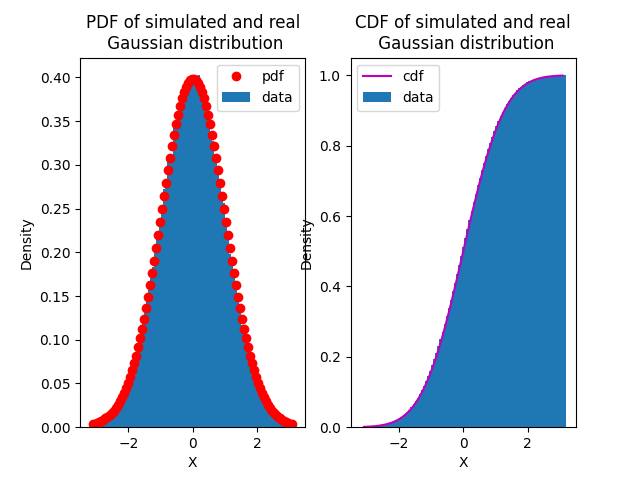

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2)
#first subplot: pdf
pdf_val= norm.pdf(x, loc=mu, scale=sigma)
#print(f'pdf of x is {pdf_val}')
ax1.cla()               
ax1.hist(simulated_values, density = True, bins=bin_edges)
ax1.plot(x, pdf_val, 'ro')
ax1.set_title('PDF of simulated and real\n Gaussian distribution')
ax1.set_ylabel('Density')
ax1.set_xlabel('X')
ax1.legend(('pdf', 'data'))

#second subplot: cdf
cdf = norm.cdf(x, loc=mu, scale=sigma)
ax2.cla()               
ax2.hist(simulated_values, cumulative = True, density=True, bins=bin_edges)
ax2.plot(x, cdf, color='m')
ax2.set_title('CDF of simulated and real\n Gaussian distribution')
ax2.set_ylabel('Density')
ax2.set_xlabel('X')
l = ax2.legend(('cdf', 'data'))

#### Log-normal distribution

(Mnemonic: “Log is normal”)

$$ \ln(x)\mathbb{\sim N}\left( \mu,\sigma^{2} \right) $$
$$ {f\text{(}x,s\text{)} = \frac{1}{xs\sqrt{2\pi}}\exp\left( \frac{(ln\ x - \mu)^{2}}{2s^{2}} \right)}$$

    Better model for most biological variables

    Python: scipy.stats.lognorm

In [22]:
#Plot of simulated and actual log normal distribution
from scipy.stats import lognorm

# original normal distribution:
sigma = 1
mu = -1
# lognormal s = exp(mu), loc = offset
s = np.exp(mu)
loc = 0
x = np.linspace(lognorm.ppf(0.001, s, loc=loc),
                lognorm.ppf(0.999, s, loc=loc), 100)
bin_edges = np.linspace(x[0]-.1, x[-1]+.1, 100)

n_simulate = 100000
simulated_values = lognorm.rvs(s, loc=loc ,size=n_simulate)


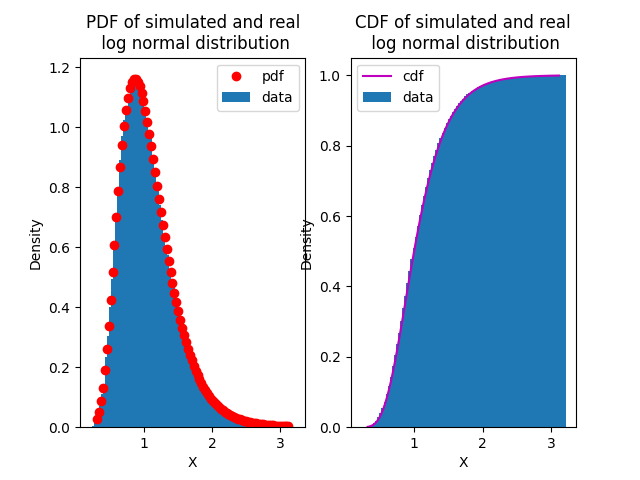

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2)
#first subplot: pdf
pdf_val= lognorm.pdf(x, s, loc=loc)
#print(f'pdf of x is {pdf_val}')
ax1.cla()               
ax1.hist(simulated_values, density = True, bins=bin_edges)
ax1.plot(x, pdf_val, 'ro')
ax1.set_title('PDF of simulated and real\n log normal distribution')
ax1.set_ylabel('Density')
ax1.set_xlabel('X')
ax1.legend(('pdf', 'data'))

#second subplot: cdf
cdf = lognorm.cdf(x, s, loc=loc)
ax2.cla()               
ax2.hist(simulated_values, cumulative = True, density=True, bins=bin_edges)
ax2.plot(x, cdf, color='m')
ax2.set_title('CDF of simulated and real\n log normal distribution')
ax2.set_xlabel('X')
l = ax2.legend(('cdf', 'data'))

#### Exponential

>
> Notation: *X* ~ Exp(*λ*).
>
$$
f(x)=\left\{\begin{array}{ll}
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x<0
\end{array}\right\}
$$

$$
F(x)=\left\{\begin{array}{cc}
1-e^{-\lambda x}, & x \geq 0 \\
0, & x<0
\end{array}\right\}
$$

$$ \lambda \text{ is the rate parameter} $$

Pyton: scipy.stats.expon

In [25]:
#Plot of simulated and actual exponential distribution
from scipy.stats import expon
# for the exponential distribution, the scale is 1/lambda
lambda_param = 3
scale = 1/lambda_param
nbins = 100
bin_edges = np.linspace(0, expon.ppf(0.9999,  scale=scale), nbins)
# center x in each bin so the pdf and the histogram will line up
x = bin_edges+(bin_edges[1]-bin_edges[0])/2

n_simulate = 1000000
simulated_values = expon.rvs(scale=scale ,size=n_simulate)

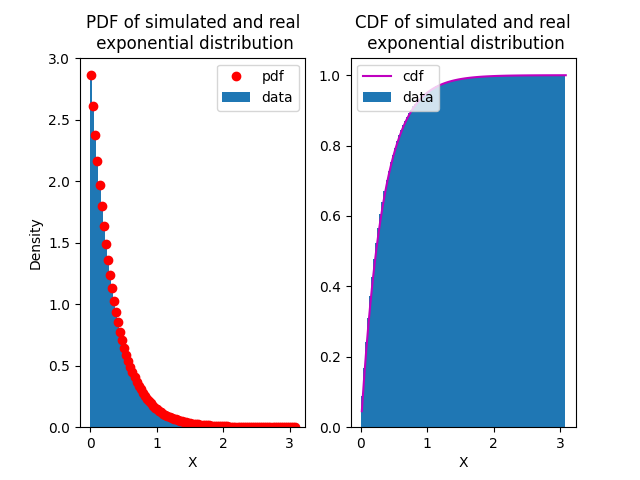

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2)
#first subplot: pdf
pdf_val= expon.pdf(x, scale=scale)
#print(f'pdf of x is {pdf_val}')
ax1.cla()               
ax1.hist(simulated_values, density = True, bins=bin_edges)
ax1.plot(x, pdf_val, 'ro')
ax1.set_title('PDF of simulated and real\n exponential distribution')
ax1.set_ylabel('Density')
ax1.set_xlabel('X')
ax1.legend(('pdf', 'data'))

#second subplot: cdf
cdf = expon.cdf(x, scale=scale)
ax2.cla()               
ax2.hist(simulated_values, cumulative = True, density=True, bins=bin_edges)
ax2.plot(x, cdf, color='m')
ax2.set_title('CDF of simulated and real\n exponential distribution')
ax2.set_xlabel('X')
l = ax2.legend(('cdf', 'data'))